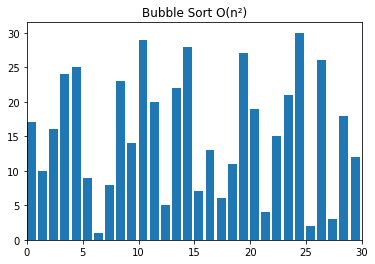

In [1]:
import random
from matplotlib import pyplot as plt, animation

def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def bubblesort(A):
    swapped = True
    
    for i in range(len(A) - 1):
        if not swapped:
            return
        swapped = False
        
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swapped = True
            yield A


def visualize():
    N = 30
    A = list(range(1, N + 1))
    random.shuffle(A)
    
    
    generator = bubblesort(A)
    
    fig, ax = plt.subplots()
    ax.set_title("Bubble Sort O(n\N{SUPERSCRIPT TWO})")
    bar_sub = ax.bar(range(len(A)), A, align="edge")
    
    ax.set_xlim(0, N)
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)
    iteration = [0]
    
    def update(A, rects, iteration):
        for rect, val in zip(rects, A):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text(f"# of operations: {iteration[0]}")

    anim = animation.FuncAnimation(
        fig,
        func=update,
        fargs=(bar_sub, iteration),
        frames=generator,
        repeat=True,
        blit=False,
        interval=15,
        save_count=90000,
    )
    
    plt.show()
    plt.close()


if __name__ == "__main__":
    visualize()